In [60]:
import ase
from ase import Atoms
from ase.calculators.lj import LennardJones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

sigma = 3.40
epsilon = 10.40
r_cutoff = 10.54
r_onset = 8

dr_min = 3.2
dr_max = 12
dr_step = 1e-2
distances = np.arange(dr_min, dr_max+dr_step, dr_step)

epot_min = 2**(1/6) * sigma

In [61]:
atoms = Atoms(positions=[[0, 0, 0], [0, 0, dr_min]])
atoms.calc = LennardJones(sigma=sigma, epsilon=epsilon, rc=r_cutoff, ro=r_onset, smooth=True)

## Compute properties over increasing distance

In [62]:
def compute_properties(atoms):
    energies = []
    forces = []

    for dr in distances:
        atoms.set_positions([[0, 0, 0], [0, 0, dr]])
        energies.append(atoms.get_potential_energy())
        force_per_atom = np.sum(atoms.get_forces(), axis=1)
        forces.append(force_per_atom)

    return energies, forces

energies, forces = compute_properties(atoms)

## Plot potential energy

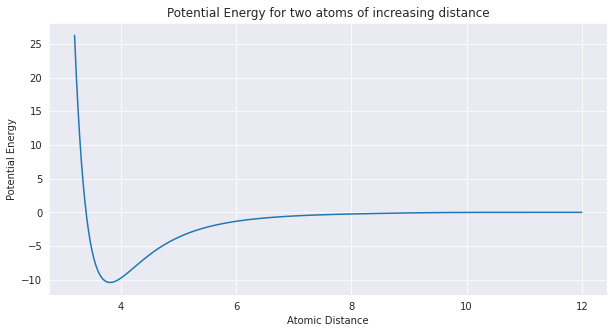

In [63]:
def plot_energy(distances, energies):
    plt.figure(figsize=(10, 5))
    plt.plot(distances, energies)
    plt.xlabel("Atomic Distance")
    plt.ylabel("Potential Energy")
    plt.title("Potential Energy for two atoms of increasing distance")
    plt.show()
    
plot_energy(distances, energies)

## Plot interatomic force

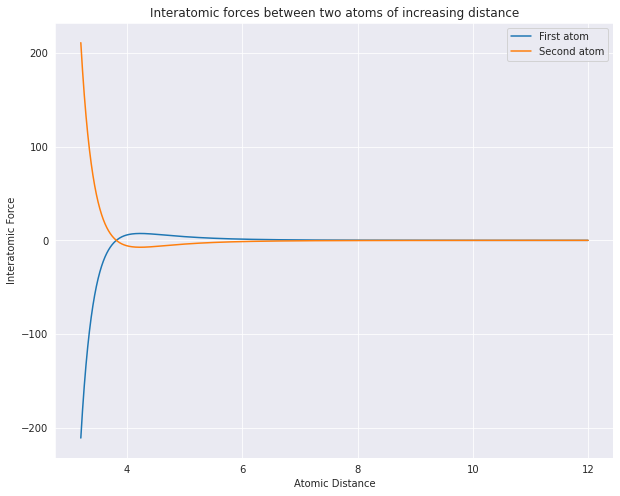

In [64]:
def plot_force(distances, forces):
    forces = np.array(forces)

    plt.figure(figsize=(10, 8))
    plt.plot(distances, forces[:,0], label="First atom")
    plt.plot(distances, forces[:,1], label="Second atom")

    plt.xlabel("Atomic Distance")
    plt.ylabel("Interatomic Force")
    plt.title("Interatomic forces between two atoms of increasing distance")
    plt.legend()
    plt.show()
    
plot_force(distances, forces)

# Without `smooth=True` and `r_onset`

## Correct case
- Everything looks good
- The energy is shifted to be precisely 0 at the cutoff
- Forces look also good

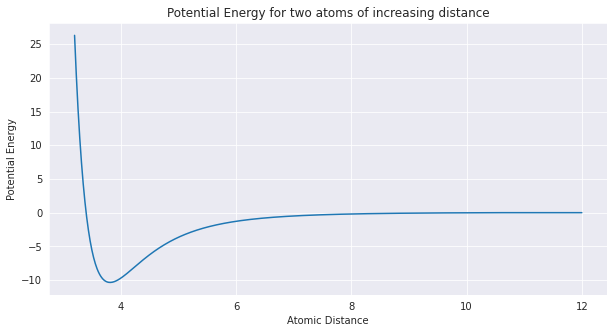

In [69]:
atoms = Atoms(positions=[[0, 0, 0], [0, 0, dr_min]])
atoms.calc = LennardJones(sigma=sigma, epsilon=epsilon, rc=r_cutoff)

energies, forces = compute_properties(atoms)
plot_energy(distances, energies)

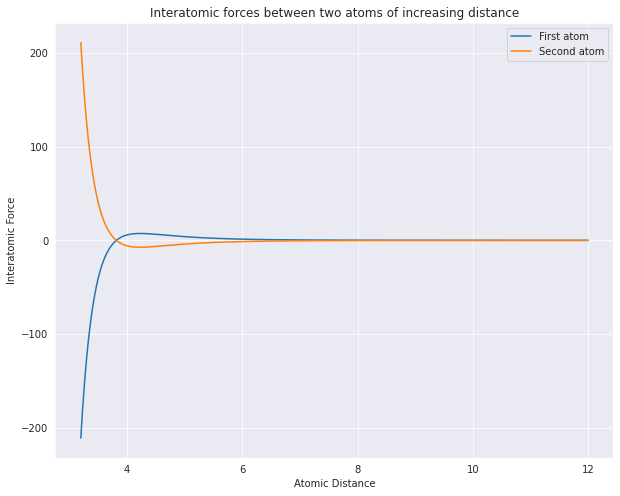

In [68]:
plot_force(distances, forces)

## Problematic case
- The radical shift to 0 might become problematic for certain cutoff values.
- Here, `r_cutoff = 5`.
- It appears that the energy does not smoothly go to 0 at the cutoff.

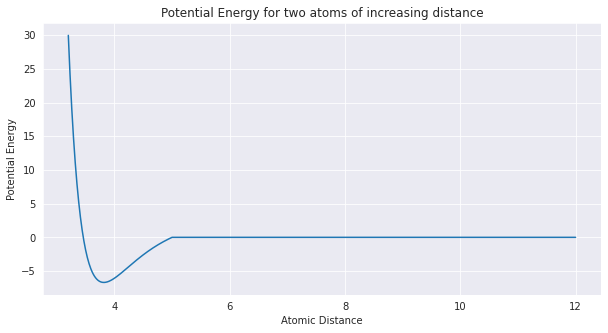

In [71]:
atoms = Atoms(positions=[[0, 0, 0], [0, 0, dr_min]])
atoms.calc = LennardJones(sigma=sigma, epsilon=epsilon, rc=5, smooth=False)

energies, forces = compute_properties(atoms)
plot_energy(distances, energies)

- Forces show a similar behavior.
- Approaching the cutoff, the force goes abruptly to 0.
- This can become problematic for MD simulations.

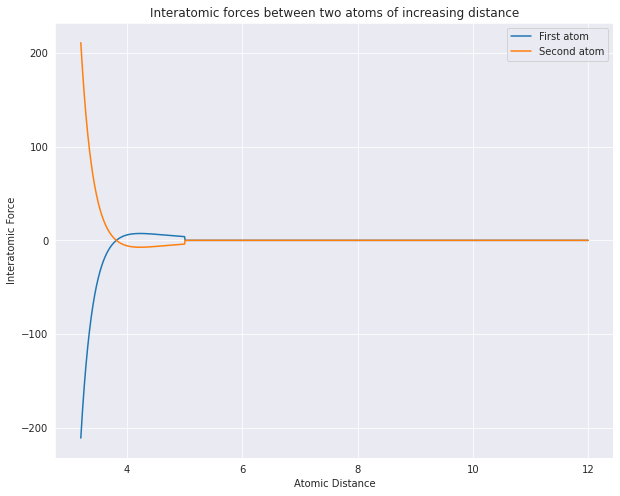

In [73]:
plot_force(distances, forces)